# Assignement 1
## Digital Musicology

@authors: JorisMonnet, Pannnnestrella, YutakaOsaki, Yiwei Liu

Due Date: 27/03/2024

## Task A: Timing Function

## Task B: Empirical findings

### 1. Subcorpus Analysis

In [2]:
from task_b.q1b import get_rawdata, violinplot_eachpart, plot_third_part

In [3]:
ADIG01_scores = get_rawdata('asap-dataset/Mozart/Piano_Sonatas/12-1/ADIG01_annotations.txt')
MunA03M_scores = get_rawdata('asap-dataset/Mozart/Piano_Sonatas/12-1/MunA03M_annotations.txt')
TET01_scores = get_rawdata('asap-dataset/Mozart/Piano_Sonatas/12-1/TET01_annotations.txt')
Original_scores = get_rawdata('asap-dataset/Mozart/Piano_Sonatas/12-1/midi_score_annotations.txt')

C:\Users\Joris\Desktop\epfl\MA4\DM_Assignement1\task_b\q1b.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  scores["b"][0] = scores["b"][0].split(",")[0]
C:\Users\Joris\Desktop\epfl\MA4\DM_Assignement1\task_b\q1b.py:9: SettingWithCopyWarn

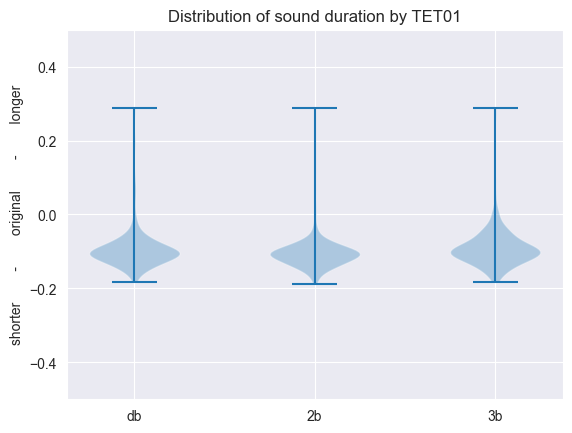

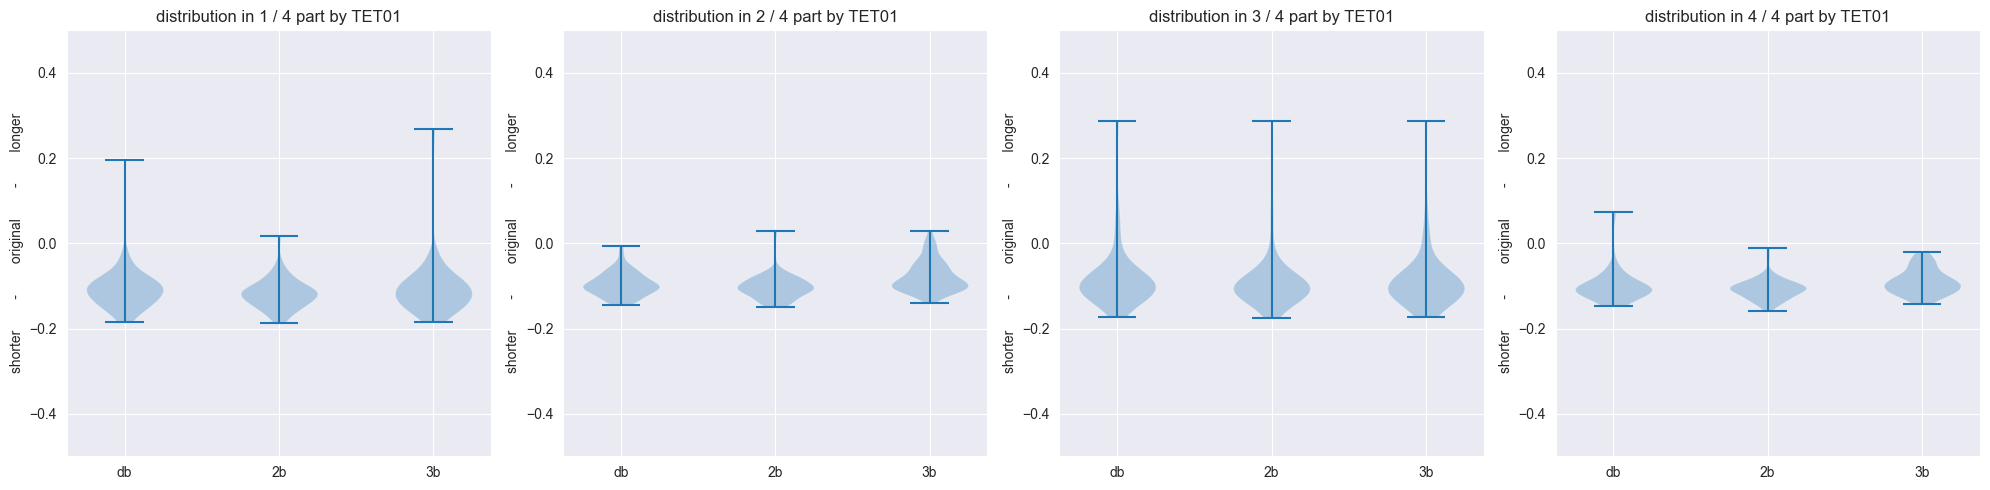

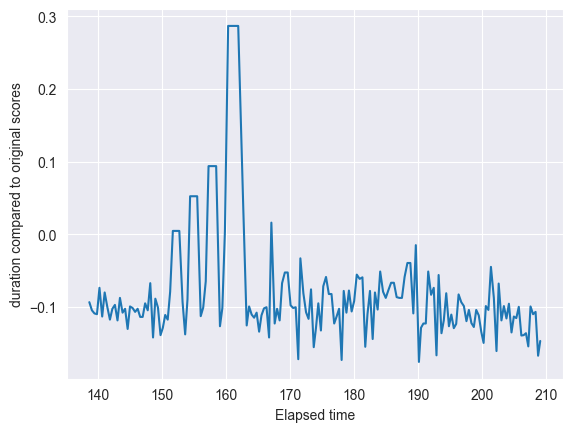

In [4]:
violinplot_eachpart(TET01_scores, Original_scores, "TET01")
plot_third_part(TET01_scores, Original_scores)

In [5]:
# TODO:
# What is the distribution of note onsets on metrical locations? 
# Answer this question separately for different time signatures. 
# At least do 4/4 and 3/4 time signatures. Illustrate your finding with figures.

In [6]:
# TODO:
# Where in the metrical grid are expressive timing likely to happen? 
# Support it with quantitative evidence. Illustrate your finding with figures.

In [7]:
# TODO:
# Think about another empirical question that you can verify from this data, and present your findings.
# 
#     (Easy example) which style has the most variability in timing.

In [8]:
# TODO:
#  (Difficult example) How well can your model generalize across different styles?

TODO: report your findings